<a href="https://colab.research.google.com/github/garfield-gray/NeuralNetwork/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
In\;the\;name\;of\;God 
$$
$$
Project\;of\;ML\;RNN 
$$

note: cells must be excecuted in order cause they've been written so

In [1]:
import numpy as np
import tensorflow as tf

import sklearn as sl
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb


# problem 2

In [2]:
d = datasets.load_breast_cancer()
x = d.data
y = d.target

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Shape of the training set:'+" "+str(x_train.shape))
print('Size of the training set:'+" "+str(x_train.shape[0]))

print('Shape of the testing set:'+" "+str(x_test.shape))
print('Size of the testing set:'+" "+str(x_test.shape[0]))

Shape of the training set: (455, 30)
Size of the training set: 455
Shape of the testing set: (114, 30)
Size of the testing set: 114


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


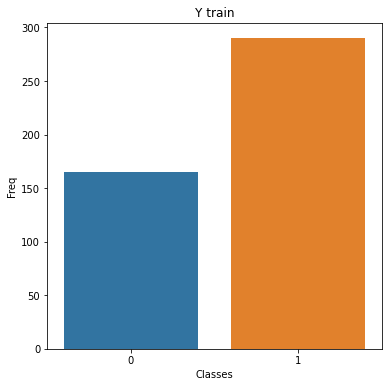

In [4]:
plt.figure(figsize = (6,6))
sb.countplot(y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")
plt.show()

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32 ,activation='relu',input_shape=(30,)),
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [6]:
def L(epoch , Ir):
  if epoch < 2:
    return Ir
  else:
    return Ir*np.exp(-0.2)
  
E = tf.keras.callbacks.EarlyStopping(patience=3 , monitor = 'val_acc')
L = tf.keras.callbacks.LearningRateScheduler(L)

In [7]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train , validation_split=0.1,epochs=100,batch_size=32, callbacks=[E, L])

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 13.3218 - accuracy: 0.4988 - val_loss: 6.4057 - val_accuracy: 0.3913 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 3.4143 - accuracy: 0.5501 - val_loss: 2.4867 - val_accuracy: 0.7174 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 1.5604 - accuracy: 0.6870 - val_loss: 1.6296 - val_accuracy: 0.7174 - lr: 8.1873e-04
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 1.2600 - accuracy: 0.7824 - val_loss: 2.0468 - val_accuracy: 0.7174 - lr: 6.7032e-04
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 1.2282 - accuracy: 0.7971 - val_loss: 1.5787 - val_accuracy: 0.6957 - lr: 5.4881e-04
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 1.1826 - accuracy: 0.7751 - val_loss: 1.6016 - val_accuracy: 0.6957 - lr: 4.4933e-04
Epoch 7/100
13/13 [==============================] - 0s 3m

In [8]:
y_pred_float = model.predict_step(x_test)  
y_pred = np.round(y_pred_float)

In [9]:
target_list=['benign','malignant']
sl.metrics.classification_report(y_true=y_test,y_pred=y_pred,output_dict = True,target_names=target_list)

{'accuracy': 0.8245614035087719,
 'benign': {'f1-score': 0.7826086956521738,
  'precision': 0.8,
  'recall': 0.7659574468085106,
  'support': 47},
 'macro avg': {'f1-score': 0.8177749360613811,
  'precision': 0.8202898550724638,
  'recall': 0.8158145442997777,
  'support': 114},
 'malignant': {'f1-score': 0.8529411764705882,
  'precision': 0.8405797101449275,
  'recall': 0.8656716417910447,
  'support': 67},
 'weighted avg': {'f1-score': 0.8239444519226454,
  'precision': 0.8238494787693873,
  'recall': 0.8245614035087719,
  'support': 114}}

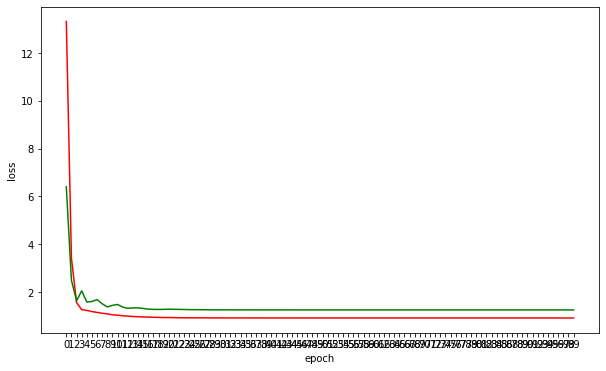

In [10]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'train', color='r')
plt.plot(history.history['val_loss'], label = 'validation', color='g')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(np.arange(0, 100, 1))
plt.show()

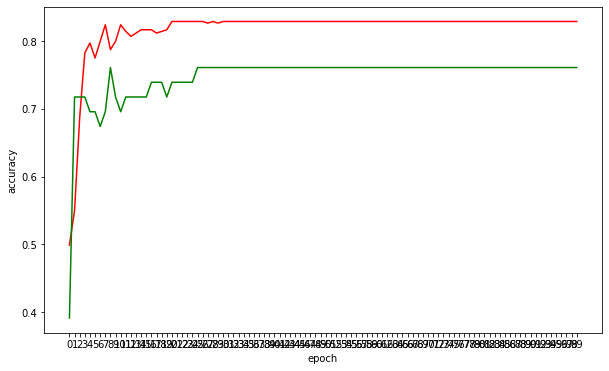

In [11]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'train', color='r')
plt.plot(history.history['val_accuracy'], label = 'validation', color='g')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xticks(np.arange(0, 100, 1))
plt.show()

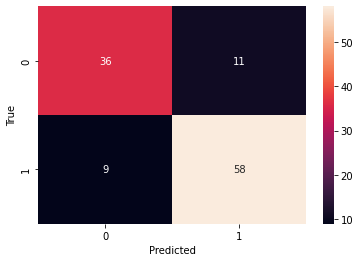

In [12]:
CM = sl.metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)
sb.heatmap(CM,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# problem 3

In [13]:
(X_train,Y_train), (X_test, Y_test) = tf.keras.datasets.imdb.load_data(num_words = 15000)

17473536/17464789 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


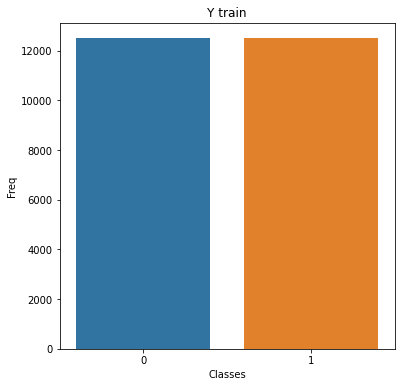

In [14]:
plt.figure(figsize = (6,6))
sb.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")
plt.show()

In [15]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN,Dense, Activation
from keras.preprocessing.sequence import pad_sequences

In [20]:
x_train = pad_sequences(X_train, maxlen = 130)
x_test = pad_sequences(X_test, maxlen = 130)

print(x_train[5])

for i in x_train[0:10]:
    print(len(i))
    

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]
130
130
130
130
130
130
130
130
130
130


we wanna define what these numbers mean in terms of words

In [17]:
word_index = tf.keras.datasets.imdb.get_word_index()
def whatItSay(index = 24):
    
    reverse_index = dict([(value,key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

1654784/1641221 [==============================] - 0s 0us/step


In [18]:
decoded_review = whatItSay(7)

! the hamiltons tells the story of the four hamilton siblings teenager francis ! ! twins ! joseph ! darlene ! ! the eldest david samuel who is now the surrogate parent in charge the ! move house a lot ! is unsure why is unhappy with the way things are the fact that his brother's sister kidnap ! murder people in the basement doesn't help relax or calm ! nerves either francis ! something just isn't right when he eventually finds out the truth things will never be the same again br br co written co produced directed by mitchell ! phil ! as the butcher brothers who's only other film director's credit so far is the april ! day 2008 remake enough said this was one of the ! to die ! at the 2006 after dark ! or whatever it's called in keeping with pretty much all the other's i've seen i thought the hamiltons was complete total utter crap i found the character's really poor very unlikable the slow moving story failed to capture my imagination or sustain my interest over it's 85 a half minute to

In [19]:
decoded_review = whatItSay(3)

! the ! ! at storytelling the traditional sort many years after the event i can still see in my ! eye an elderly lady my friend's mother retelling the battle of ! she makes the characters come alive her passion is that of an eye witness one to the events on the ! heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ! of scotland as i discussed it with a friend one night in ! a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ! fact and fiction blend with ! role models warning stories ! magic and mystery br br my name is ! like my grandfather and his grandfather before him our prota

In [25]:
rnn = Sequential()
rnn.add(Embedding(15000, 32, input_length = len(x_train[0])))
rnn.add(SimpleRNN(16, input_shape = (15000, 130), return_sequences = False, activation = "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
def L(epoch , Ir):
  if epoch < 2:
    return Ir
  else:
    return Ir*np.exp(-0.2)
  
E = tf.keras.callbacks.EarlyStopping(patience=3 , monitor = 'val_acc')
L = tf.keras.callbacks.LearningRateScheduler(L)
M = tf.keras.callbacks.ModelCheckpoint(filepath='/tmp/blah')

In [43]:
x_train = pad_sequences(x_train, maxlen = 130)
x_test = pad_sequences(x_test, maxlen = 130)

In [44]:
history = rnn.fit(x_train, Y_train, validation_split=0.1,epochs = 20, batch_size = 128, verbose = 1, callbacks=[E, L, M])

Epoch 1/20
175/176 [============================>.] - ETA: 0s - loss: 0.0583 - accuracy: 0.9805WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy
INFO:tensorflow:Assets written to: /tmp/blah/assets
176/176 [==============================] - 6s 32ms/step - loss: 0.0583 - accuracy: 0.9804 - val_loss: 0.5264 - val_accuracy: 0.8556 - lr: 2.7324e-05
Epoch 2/20
176/176 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.9811WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy
INFO:tensorflow:Assets written to: /tmp/blah/assets
176/176 [==============================] - 6s 33ms/step - loss: 0.0577 - accuracy: 0.9811 - val_loss: 0.5296 - val_accuracy: 0.8552 - lr: 2.7324e-05
Epoch 3/20
176/176 [==============================] - ETA: 0s - loss: 0.0570 - accuracy: 0.9812WARNING:tensorf

In [45]:
score = rnn.evaluate(x_test, Y_test)
print("Accuracy: %",score[1]*100)

782/782 [==============================] - 4s 5ms/step - loss: 0.5598 - accuracy: 0.8420
Accuracy: % 84.19600129127502


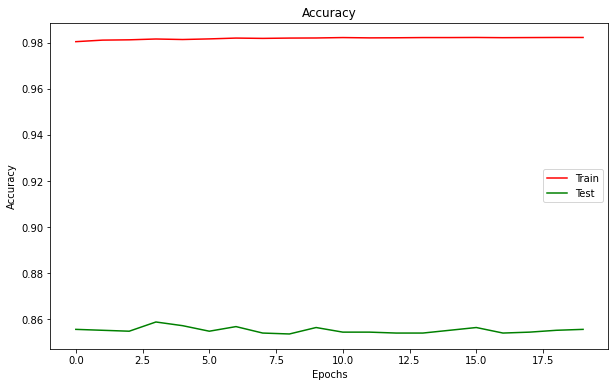

In [46]:
plt.figure(figsize=(10,6))
plt.plot(history.history["accuracy"], label = "Train", color = 'r')
plt.plot(history.history["val_accuracy"], label = "Test", color = 'g')
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

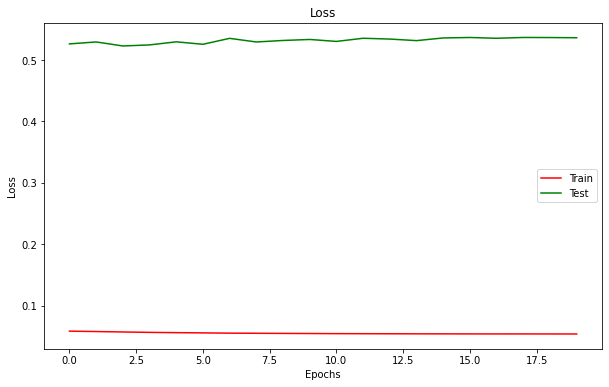

In [47]:
plt.figure(figsize=(10,6))
plt.plot(history.history["loss"], label = "Train", color = 'r')
plt.plot(history.history["val_loss"], label = "Test", color = 'g')
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [48]:
y_pred_float = rnn.predict(x_test)
y_pred = np.round(y_pred_float)

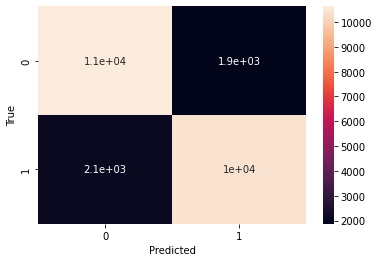

In [49]:
CM = sl.metrics.confusion_matrix(y_true=Y_test,y_pred=y_pred)
sb.heatmap(CM,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Problem 4